#CNN & LSTM Deep Learning Models
By **Christa Baca (@cjb-dev)**

#Description
The goal of this project is to create, train, and evaluate the accuracy of deep learning (DL) models for computer vision and natural language processing, using **convolutional neural networks (CNN)** and **long short-term memory (LSTM)** neural networks for each topic respectively.

The first half of this project deals with computer vision, specifically in the realm of *image classification*, using data from the [CIFAR-100 Small Images Classification Dataset](https://keras.io/api/datasets/cifar100/). 

The second half of this project deals with natural language processing, specifically for sentiment analysis / text classification, using data from the [Reueters Newswire Classification Dataset](https://keras.io/api/datasets/reuters/).

While initial testing of these models (& obtaining decent accuracy) would take 40-60 minutes, the following models seemed to have taken around 13 and 7 minutes respectively. Yay! 

For this project, the [Tensorflow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) is used for loading the datasets and selecting the 'activation function', 'loss', 'optimizer' & 'metrics'.  

## Part 1: Import Libraries

The code here imports the libraries necessary for this program. I did not add any other libraries that weren't already in the skeleton code for the assignment.

In [ ]:
# import all required libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random


##Part 2: Computer Vision - CNN

The following code blocks are for developing, training and testing a **Convolutional Neural Network** model for the Computer Vision task of object / image classification, using data from the **CIFAR-100 dataset**. 

The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). 

More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

### Load / Prepare Data

Load the CIFAR-100 dataset and prepare / normalize the data to be used for the DL model creation and training.



In [ ]:
# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']


In [ ]:
# Load the data - training as well as testing
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode="fine")


###Visualize Data

Visualize the data by plotting 100 random images, one each for the 100 classes.

In [ ]:
# creates array of sorted images (total = 50000 images, first 500 have '0' labels, second 500 have '1' labels, and so on...)
sorted_images = []

# iterates through 100 (for each class)
for i in range(len(fine_labels)):
  # iterates through labels for the entire training dataset
  for j in range(len(y_train)):
    # if the label in y_train matches the current class index (i),
    if i == y_train[j]:
      # add the image associated with that label to the sorted array
      sorted_images.append((x_train[j], y_train[j])) # holds (image, label)
      

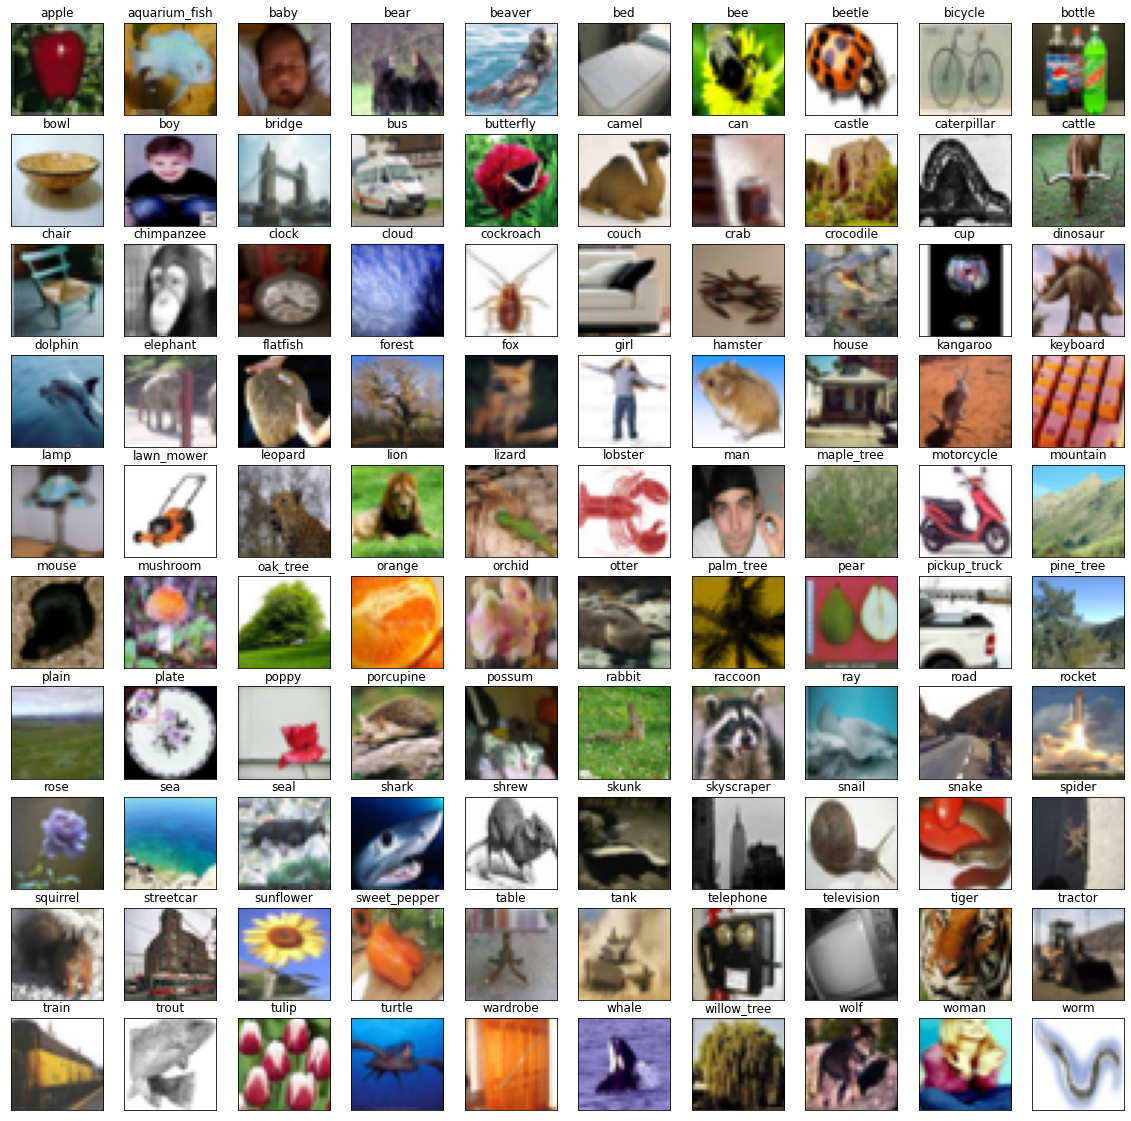

In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total

### Creating list of random images
# initialize variables
rand_val = 0
random_images = [] # holds random images (total = 100 images)

# iterates through sorted images in increment steps of 500
for index in np.arange(0, len(sorted_images), 500):
  # for each step, choose a random value in that step (0-499, then 500-999, and so on) to serve as a random index
  rand_val = index + random.randint(0, 499)
  # append the image at that random index to the random images array
  random_images.append(sorted_images[rand_val][0])


### Visualizing random list created above
# define figure size
fig=plt.figure(figsize=(20, 20))
# visualize random images from cifar100 dataset
for index in range(len(fine_labels)):
    # to draw images in a 10x10 matrix
    fig.add_subplot(10, 10, index + 1)
    plt.imshow(random_images[index])
    # avoid showing tick marks
    plt.xticks([])
    plt.yticks([])
    # print label (always in alphabetical order)
    plt.title("{}".format(fine_labels[index]))

# plot random data visualization
plt.show()


In [ ]:
# Normalize/prepare the data
x_train = x_train / 255.0
x_test = x_test / 255.0


### Create the CNN Model

Creates a DL model using CNN layers and prints the DL model summary.

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
model_cnn = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=[x_train.shape[1], x_train.shape[2], 3]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=len(np.unique(y_train)), activation='softmax')
])
model_cnn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0

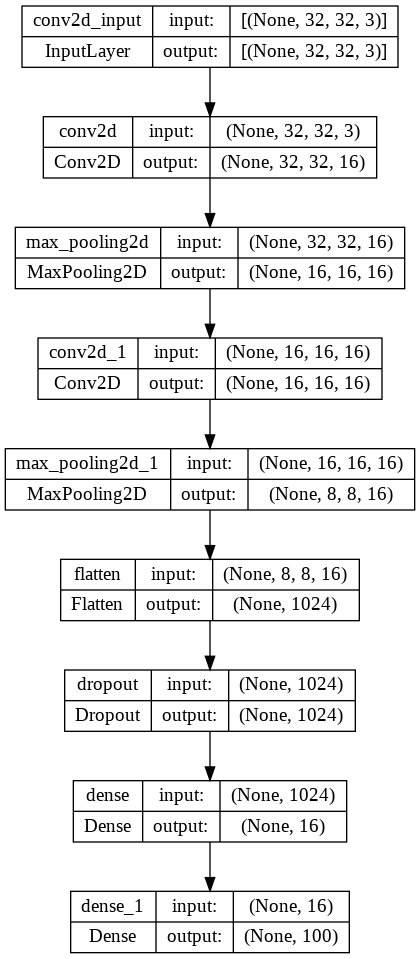

In [ ]:
# Print the DL model summary
print(model_cnn.summary())
keras.utils.plot_model(model_cnn, show_shapes = True)


### Training

 Trains / fits the DL model using the CIFAR-100 data (with a validation split of 20%), then create 2 graphs:

 Graph 1: plots training & validation accuracy.

 Graph 2: plots training loss and validation loss.

*Note from assignment:* Both graphs should show that the model does NOT overfit, e.g, the accuracy & loss curves for validation and training should be similar. Overfitting occurs if the training graph keeps improving and the validation graph stays constant or it degrades.


In [ ]:
# Train/fit the DL model using the training CIFAR-100 data
# Takes approx 3 minutes to run
history = model_cnn.fit(x_train, y_train, batch_size = 50, epochs = 50, verbose = 1, validation_split = 0.2)


Epoch 1/50
800/800 [==============================] - 7s 5ms/step - loss: 4.3076 - accuracy: 0.0464 - val_loss: 4.0278 - val_accuracy: 0.0884
Epoch 2/50
800/800 [==============================] - 4s 5ms/step - loss: 3.9100 - accuracy: 0.1019 - val_loss: 3.7308 - val_accuracy: 0.1270
Epoch 3/50
800/800 [==============================] - 4s 4ms/step - loss: 3.6796 - accuracy: 0.1381 - val_loss: 3.6033 - val_accuracy: 0.1480
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: 3.5739 - accuracy: 0.1523 - val_loss: 3.5244 - val_accuracy: 0.1569
Epoch 5/50
800/800 [==============================] - 4s 4ms/step - loss: 3.4917 - accuracy: 0.1634 - val_loss: 3.4267 - val_accuracy: 0.1739
Epoch 6/50
800/800 [==============================] - 4s 4ms/step - loss: 3.4248 - accuracy: 0.1728 - val_loss: 3.3806 - val_accuracy: 0.1809
Epoch 7/50
800/800 [==============================] - 4s 4ms/step - loss: 3.3752 - accuracy: 0.1845 - val_loss: 3.3241 - val_accuracy: 0.1908
Epoch 

Text(0, 0.5, 'Accuracy')

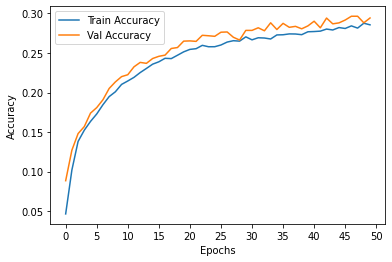

In [ ]:
# Plot the training & validation accuracy
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
# Legend
plt.legend(loc="upper left")
# Specify number of ticks
plt.xticks(np.arange(0, 51, step=5))
# Axis labels
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


Text(0, 0.5, 'Loss')

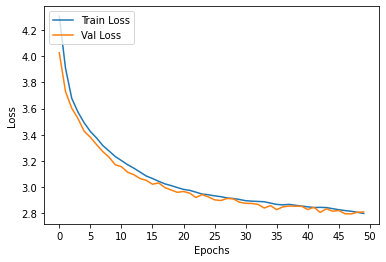

In [ ]:
# Plot the training & validation loss
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
# Legend
plt.legend(loc="upper left")
# Specify number of ticks
plt.xticks(np.arange(0, 51, step=5))
# Axis labels
plt.xlabel("Epochs")
plt.ylabel("Loss")


### Testing / Evaluation

Evaluates the trained DL model on the CIFAR-100 test dataset and prints the accuracy value. References for the benchmark performances of different techniques on this dataset can be found [here](https://benchmarks.ai/cifar-100).

In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
model_cnn.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 2.7889 - accuracy: 0.2980


[2.788865327835083, 0.2980000078678131]

#Part 3: Natural Language Processing - LSTM

The following code blocks are for developing, training and testing **Long Short-Term Memory** for the Natural Language Processing task of sentiment analysis / text classification, using data from the **Reuters Newswire Classification Dataset**. 

The dataset consists of newswires from Reuters, labeled over 46 topics. 

More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) and [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.

### Load / Prepare Data

Load the Reuters dataset and prepare / normalize the data to be used for the DL model creation and training. 
 *   Select the vocabulary size while loading the data. The data will be loaded as integer representations for each word.

 *   Each data entry (newswire) can be of different lengths. Make each newswire consistent, i.e, same number of words.
 *   'Pad' words (say 0) to get to the standard length or remove words.

In [ ]:
reuters_topics = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
 'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
 'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
 'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']
 

In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=20000)


###Visualize Data

Prints 5 random, complete reviews from the dataset -- each from  a different topic.
 *   Each review when loaded from Keras will just be a list of numbers.
 *   Obtain the word_index which maps each number to an actual word. ( Use this as reference - https://keras.io/api/datasets/imdb/#get_word_index-function)
 *   Using this, convert a random review (which is just a list of numbers) to a list of words.

In [ ]:
# Print randomly 5 complete reviews from the dataset
#   Each review when loaded from Keras will just be a list of numbers
#   Obtain the word_index which maps each number to an actual word
#   Using this convert a random review which is just a list of numbers to a list of words
#   Print 5 such random reviews from the entire dataset -- each from a different topic.
#   Use this as reference - https://keras.io/api/datasets/imdb/#get_word_index-function
# Use the default parameters to keras.datasets.reuters.load_data
pad_char = 0 # padding
start_char = 1 # start of review 
oov_char = 2 # out of vocabulary
index_from = 3 
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.reuters.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[pad_char] = "<PAD>"
inverted_word_index[start_char] = "<START>"
inverted_word_index[oov_char] = "<OOV>"

### Creates random review lists
# initialize variables
rand_val = 0
random_index_list = [] # holds random index (0 - length of x_train dataset) for reviews
random_topics = [] # holds randomly selected reuters topics (up to 46 topics) 

# updates random_topic index until it has 5 entries total
while len(random_index_list) < 5:
    # chooses a random index value
    rand_val = random.randint(0, len(x_train)-1)
    # determines if topic with review at rand_val has already been added to random_topics list (helps to avoid repeated topics)
    if y_train[rand_val] not in random_topics:
        # if so, append the topic to the random_topics array
        random_topics.append(y_train[rand_val])
        # and then append the review index to the random_index array
        random_index_list.append(rand_val)
    
### Decodes/prints random reviews
# iterates over array of chosen random indices for 5 reviews
for index in random_index_list:
    # decodes the class / topic for the review
    decoded_class = reuters_topics[y_train[index]]
    # decodes the review
    decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[index])
    # prints results
    print(y_train[index], decoded_class)
    print(decoded_sequence)


4 acq
said the acquisition will give it a strong position in the growing market for specialty magazines under a separate agreement affiliated said that certain members of <OOV> management plan to buy up to 10 pct of the equity in billboard following <OOV> acquisition of the company billboard publishes eight specialty magazines including billboard magazine and 15 annual <OOV> it also publishes and distributes speciality books under four <OOV> and operates two book clubs affiliated is the parent company of globe newspaper co publisher of the boston globe it also has interests in cellular telephone and paging services providers reuter 3
3 earn
that it was profitable in the second half ended yesterday after a first half operating loss of 17 billion yen nissan chief financial officer <OOV> <OOV> in a speech before an automotive seminar said he attributed the improvement to cost reductions and <OOV> of operations he said if exchange rates stabilize nissan will have a strong profit recovery i

In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=100, value=0, padding='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=100, value=0, padding='post')

# get word index dictionary for reuters dataset
tf.keras.datasets.reuters.get_word_index(path="reuters_word_index.json") 


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

### Create the LSTM Model
Creates a DL model using LSTM layers and prints the DL model summary.

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
model_lstm = keras.Sequential([
    keras.layers.Embedding(input_dim=20000, output_dim=64),
    keras.layers.LSTM(units=128, return_sequences=True),
    keras.layers.LSTM(units=16, return_sequences=False),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=len(np.unique(y_train)), activation='sigmoid')
])
model_lstm.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_45 (Embedding)    (None, None, 64)          1280000   
                                                                 
 lstm_91 (LSTM)              (None, None, 128)         98816     
                                                                 
 lstm_92 (LSTM)              (None, 16)                9280      
                                                                 
 flatten_46 (Flatten)        (None, 16)                0         
                                                                 
 dropout_46 (Dropout)        (None, 16)                0         
                                                                 
 dense_92 (Dense)            (None, 16)                272       
                                                                 
 dense_93 (Dense)            (None, 46)              

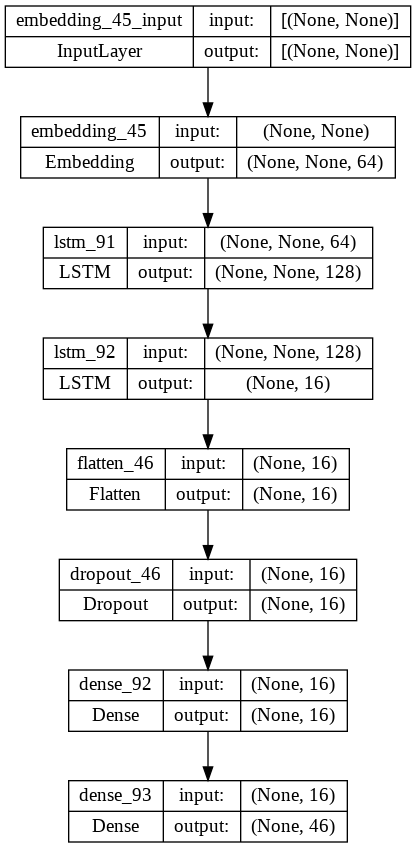

In [ ]:
# Print the DL model summary
print(model_lstm.summary())
keras.utils.plot_model(model_lstm, show_shapes=True)


### Training

 Trains / fits the DL model using the Reuters data (with a validation split of 20%), then create 2 graphs:

 Graph 1: plots training & validation accuracy.

 Graph 2: plots training loss and validation loss.

*Note from assignment:* Both graphs should show that the model does NOT overfit, e.g, the accuracy & loss curves for validation and training should be similar. Overfitting occurs if the training graph keeps improving and the validation graph stays constant or it degrades.

In [ ]:
# Train/fit the DL model using the training Reuters data
# Takes approx 1 minute to run
history = model_lstm.fit(x=x_train, y=y_train, batch_size=50, epochs=20, verbose=1, validation_split=0.2)


Epoch 1/20
144/144 [==============================] - 6s 22ms/step - loss: 2.8503 - accuracy: 0.2653 - val_loss: 2.4270 - val_accuracy: 0.3450
Epoch 2/20
144/144 [==============================] - 2s 16ms/step - loss: 2.4654 - accuracy: 0.3396 - val_loss: 2.3346 - val_accuracy: 0.3450
Epoch 3/20
144/144 [==============================] - 2s 17ms/step - loss: 2.3255 - accuracy: 0.3541 - val_loss: 2.4142 - val_accuracy: 0.3461
Epoch 4/20
144/144 [==============================] - 2s 17ms/step - loss: 2.2628 - accuracy: 0.3541 - val_loss: 2.0709 - val_accuracy: 0.3584
Epoch 5/20
144/144 [==============================] - 2s 16ms/step - loss: 2.1269 - accuracy: 0.3734 - val_loss: 1.9833 - val_accuracy: 0.3929
Epoch 6/20
144/144 [==============================] - 2s 17ms/step - loss: 2.0880 - accuracy: 0.3827 - val_loss: 1.9341 - val_accuracy: 0.3695
Epoch 7/20
144/144 [==============================] - 2s 17ms/step - loss: 1.9836 - accuracy: 0.4038 - val_loss: 1.8462 - val_accuracy: 0.5008

Text(0, 0.5, 'Accuracy')

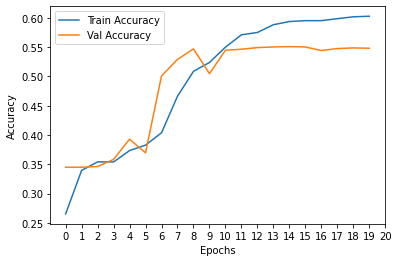

In [ ]:
# Plot the training & validation accuracy
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
# Legend
plt.legend(loc="upper left")
# Specify number of ticks
plt.xticks(np.arange(0, 21, step=1))
# Axis labels
plt.xlabel("Epochs")
plt.ylabel("Accuracy")


Text(0, 0.5, 'Loss')

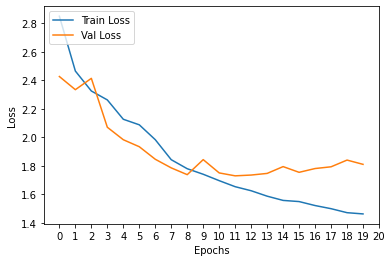

In [ ]:
# Plot the training & validation loss
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
# Legend
plt.legend(loc="upper left")
# Specify number of ticks
plt.xticks(np.arange(0, 21, step=1))
# Axis labels
plt.xlabel("Epochs")
plt.ylabel("Loss")


### Testing / Evaluation

Evaluates the trained DL model on the Reuters test dataset and prints the accuracy value.

In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
model_lstm.evaluate(x_test, y_test)


71/71 [==============================] - 1s 8ms/step - loss: 1.8534 - accuracy: 0.5419


[1.8533523082733154, 0.5418521761894226]